<a href="https://colab.research.google.com/github/ahhyun-moon/6643-computer-vision/blob/main/%08CV2_Correlation_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def convolution(f, I):
  # Convert input images into float arrays
  filter = np.array(f, dtype=float)
  image = np.array(I, dtype=float)

  # Get dimensions of the image and kernel
  if len(filter.shape) == 1:
    f_height = 1
    f_width = len(filter)
  else:
    f_height, f_width = np.shape(filter)

  if len(image.shape) == 1:
    i_height = 1
    i_width = len(image)
  else:
    i_height, i_width = np.shape(image)

  pad_height = f_height // 2
  pad_width = f_width // 2
  if pad_height == 0: pad_height = 1
  if pad_width == 0: pad_width = 1

  padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')

  # Compute im_conv = f*I
  im_conv = np.zeros_like(image, dtype=float)

  # Perform convolution
  for i in range(i_height):
    for j in range(i_width):
      im_conv[i, j] = np.sum(padded_image[i:i+f_height, j:j+f_width] * f)

  return im_conv

In [ ]:
def gaussian_filter(sigma):
    size = int(6 * sigma + 1)
    if size % 2 == 0:
        size += 1
    center = size // 2
    kernel = np.zeros(size)
    for i in range(size):
        x = i - center
        kernel[i] = np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    kernel /= np.sum(kernel)
    return kernel

In [ ]:
def denoise_image(image, sigma):
  # Create 1D Gaussian filters for horizontal and vertical directions
  Gx = gaussian_filter(sigma)
  Gy = np.vstack(Gx)
  intermediate_result = convolution(Gx, image)
  denoised_image = convolution(Gy,intermediate_result)
  return denoised_image

In [ ]:
def gradient_magnitude(dx, dy):
  return np.sqrt(np.square(dx) + np.square(dy))

def threshold_image(image, threshold):
  return (image > threshold) * 255

In [ ]:
def imageAdjust(image):
  min_val = np.min(image)
  max_val = np.max(image)
  adjusted = ((image - min_val) / (max_val - min_val) * 255)
  return adjusted.astype(np.uint8)

In [ ]:
# 1) Version via first derivatives:
def first_derivatives(image):
  # First derivative filters
  dx_filter = np.array([[-1, 0, 1]])
  dy_filter = dx_filter.T
  dx = convolution(dx_filter, image)
  dy = convolution(dy_filter, image)
  return dx,dy

In [ ]:
img = Image.open('/content/drive/MyDrive/ComputerVision_Project2/cameraman.png')
img_arr = np.array(img).astype(float)

first_der_x,first_der_y = first_derivatives(img_arr)
first_der_gradient = gradient_magnitude(first_der_x, first_der_y)

# Adjust values for display
dx_adjusted = imageAdjust(first_der_x)
dy_adjusted = imageAdjust(first_der_y)
magnitude_adjusted = imageAdjust(first_der_gradient)

# Threshold the magnitude image
thresholded_magnitude_25 = threshold_image(magnitude_adjusted, 25)
thresholded_magnitude_80 = threshold_image(magnitude_adjusted, 80)


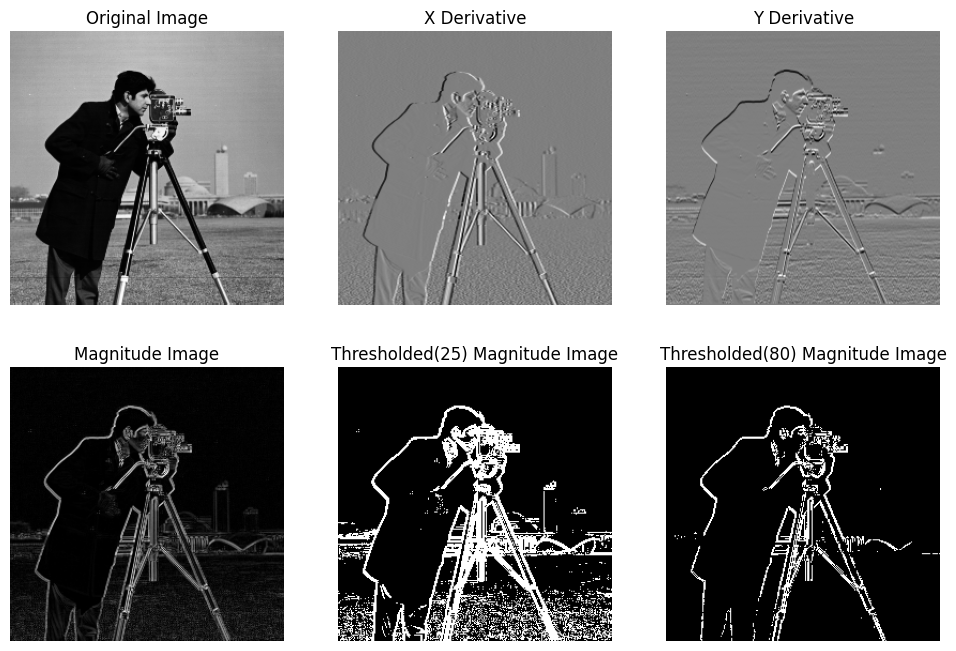

In [ ]:
# Show images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(dx_adjusted, cmap='gray')
plt.title('X Derivative')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dy_adjusted, cmap='gray')
plt.title('Y Derivative')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(magnitude_adjusted, cmap='gray')
plt.title('Magnitude Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(thresholded_magnitude_25, cmap='gray')
plt.title('Thresholded(25) Magnitude Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(thresholded_magnitude_80, cmap='gray')
plt.title('Thresholded(80) Magnitude Image')
plt.axis('off')

plt.show()

(-0.5, 255.5, 255.5, -0.5)

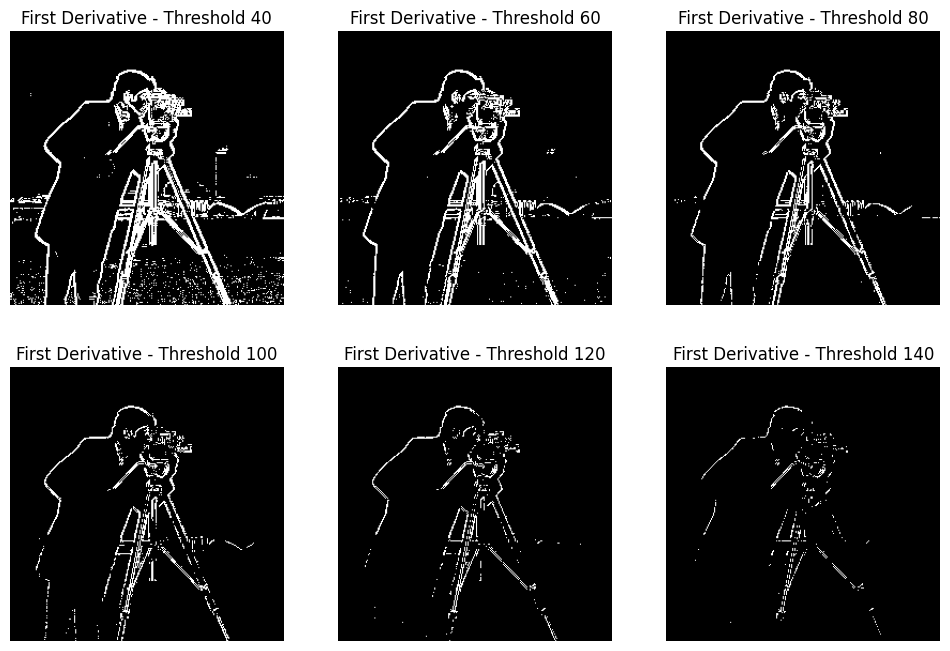

In [ ]:
# Threshold the magnitude image
thresholded_magnitude_40 = threshold_image(magnitude_adjusted, 40)
thresholded_magnitude_60 = threshold_image(magnitude_adjusted, 60)
thresholded_magnitude_80 = threshold_image(magnitude_adjusted, 80)
thresholded_magnitude_100 = threshold_image(magnitude_adjusted, 100)
thresholded_magnitude_120 = threshold_image(magnitude_adjusted, 120)
thresholded_magnitude_140 = threshold_image(magnitude_adjusted, 140)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(thresholded_magnitude_40, cmap='gray')
plt.title('First Derivative - Threshold 40')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(thresholded_magnitude_60, cmap='gray')
plt.title('First Derivative - Threshold 60')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(thresholded_magnitude_80, cmap='gray')
plt.title('First Derivative - Threshold 80')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(thresholded_magnitude_100, cmap='gray')
plt.title('First Derivative - Threshold 100')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(thresholded_magnitude_120, cmap='gray')
plt.title('First Derivative - Threshold 120')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(thresholded_magnitude_140, cmap='gray')
plt.title('First Derivative - Threshold 140')
plt.axis('off')

In [ ]:
zebra_img = Image.open('/content/drive/MyDrive/ComputerVision_Project2/zebra.png')
zebra_img_arr = np.array(zebra_img)

z_first_der_x,z_first_der_y = first_derivatives(zebra_img_arr)
z_first_der_gradient = gradient_magnitude(z_first_der_x, z_first_der_y)

# Adjust values for display
z_dx_adjusted = imageAdjust(z_first_der_x)
z_dy_adjusted = imageAdjust(z_first_der_y)
z_magnitude_adjusted = imageAdjust(z_first_der_gradient)

# Threshold the magnitude image
z_thresholded_magnitude_25 = threshold_image(z_magnitude_adjusted, 25)
z_thresholded_magnitude_50 = threshold_image(z_magnitude_adjusted, 50)


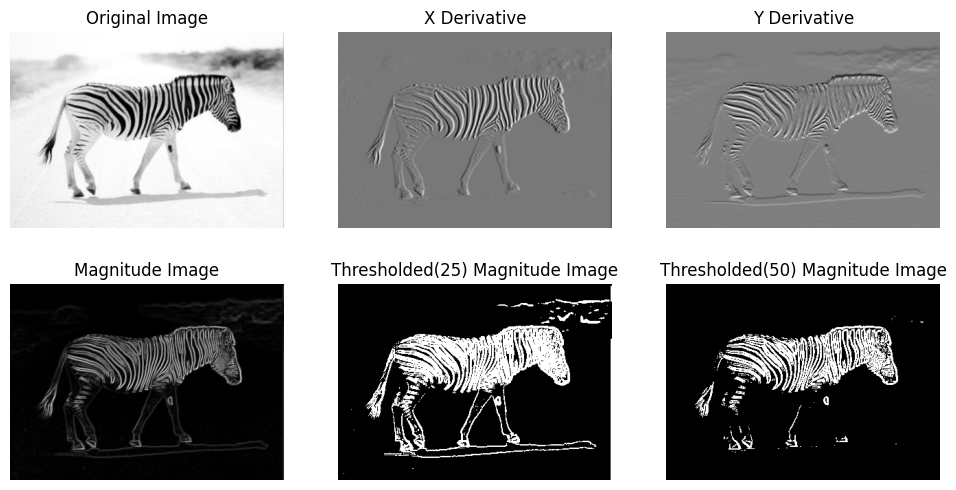

In [ ]:
# Show images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(zebra_img_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(z_dx_adjusted, cmap='gray')
plt.title('X Derivative')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(z_dy_adjusted, cmap='gray')
plt.title('Y Derivative')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(z_magnitude_adjusted, cmap='gray')
plt.title('Magnitude Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(z_thresholded_magnitude_25, cmap='gray')
plt.title('Thresholded(25) Magnitude Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(z_thresholded_magnitude_50, cmap='gray')
plt.title('Thresholded(50) Magnitude Image')
plt.axis('off')

plt.show()

(-0.5, 398.5, 285.5, -0.5)

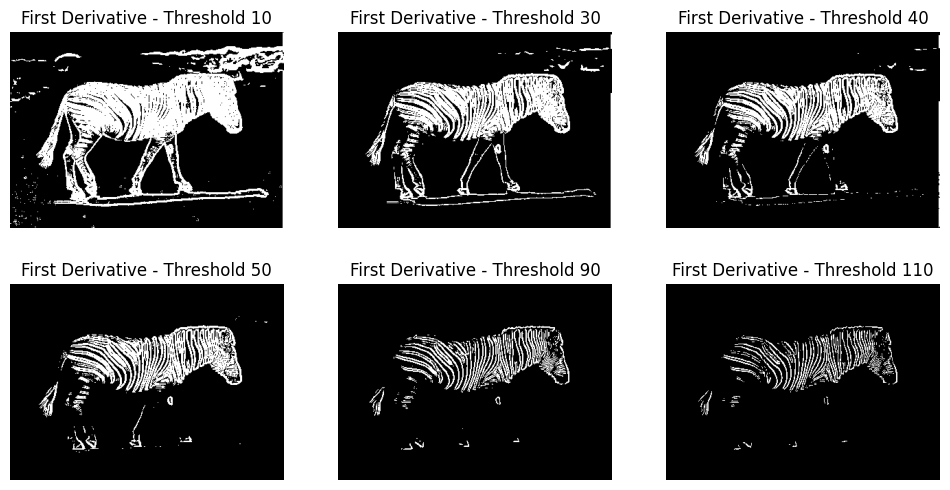

In [ ]:
# Threshold the magnitude image
z_thresholded_magnitude_10 = threshold_image(z_magnitude_adjusted, 10)
z_thresholded_magnitude_30 = threshold_image(z_magnitude_adjusted, 30)
z_thresholded_magnitude_50 = threshold_image(z_magnitude_adjusted, 50)
z_thresholded_magnitude_40 = threshold_image(z_magnitude_adjusted, 40)
z_thresholded_magnitude_90 = threshold_image(z_magnitude_adjusted, 90)
z_thresholded_magnitude_110 = threshold_image(z_magnitude_adjusted, 110)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(z_thresholded_magnitude_10, cmap='gray')
plt.title('First Derivative - Threshold 10')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(z_thresholded_magnitude_30, cmap='gray')
plt.title('First Derivative - Threshold 30')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(z_thresholded_magnitude_40, cmap='gray')
plt.title('First Derivative - Threshold 40')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(z_thresholded_magnitude_50, cmap='gray')
plt.title('First Derivative - Threshold 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(z_thresholded_magnitude_90, cmap='gray')
plt.title('First Derivative - Threshold 90')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(z_thresholded_magnitude_110, cmap='gray')
plt.title('First Derivative - Threshold 110')
plt.axis('off')

In [ ]:
# 2) Version via zero-crossings of second derivative
def lapalacian_image(smoothed_img):
  laplacian_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
  laplacian_filtered = convolution(laplacian_filter, smoothed_img)
  return laplacian_filtered

In [ ]:
def zero_crossings(lapalacian_image, delta):
  zero_crossings = np.zeros_like(lapalacian_image)
  rows, cols = lapalacian_image.shape
  for i in range(1, rows - 1):
    for j in range(1, cols - 1):
      if lapalacian_image[i, j] > 0:
        center = lapalacian_image[i, j]
        neighbors = lapalacian_image[i-1:i+2, j-1:j+2]
        if (neighbors < 0).any() and (center - neighbors >= delta).any():
          zero_crossings[i, j] = 255
  return zero_crossings

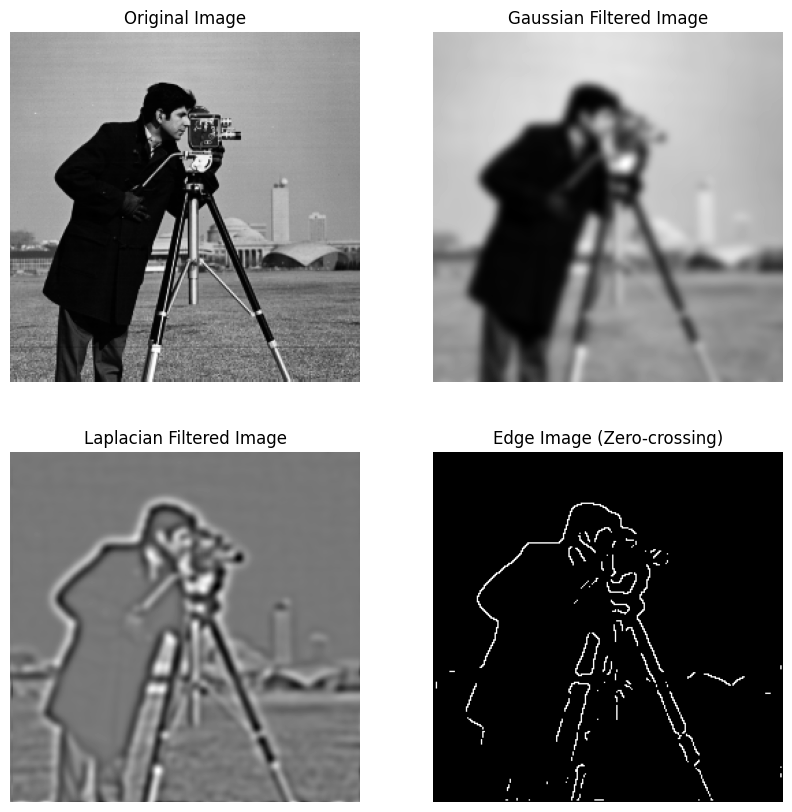

In [ ]:
denoised_image = denoise_image(img_arr, 3.0) # sigma = 3.0
laplacian_image = lapalacian_image(denoised_image)
edge_image = zero_crossings(laplacian_image, 2) # delta = 2.0

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Image (Zero-crossing)')
plt.axis('off')

plt.show()

(-0.5, 255.5, 255.5, -0.5)

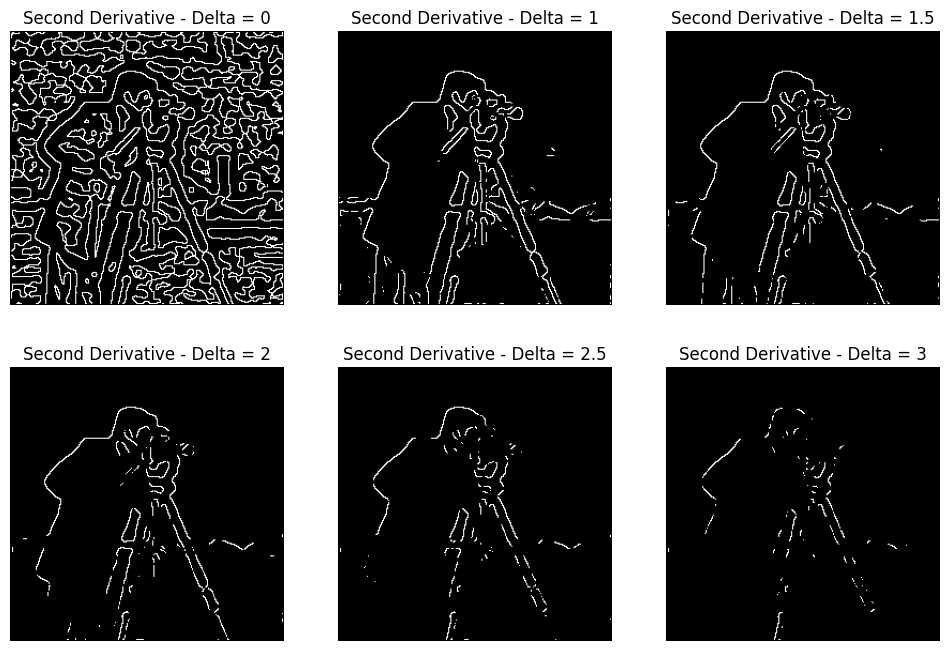

In [ ]:
edge_image_0 = zero_crossings(laplacian_image, 0)
edge_image_1 = zero_crossings(laplacian_image, 1)
edge_image_1_6 = zero_crossings(laplacian_image, 1.5)
edge_image_2 = zero_crossings(laplacian_image, 2.0)
edge_image_2_6 = zero_crossings(laplacian_image, 2.5)
edge_image_3 = zero_crossings(laplacian_image, 3.0)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(edge_image_0, cmap='gray')
plt.title('Second Derivative - Delta = 0')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edge_image_1, cmap='gray')
plt.title('Second Derivative - Delta = 1')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(edge_image_1_6, cmap='gray')
plt.title('Second Derivative - Delta = 1.5')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edge_image_2, cmap='gray')
plt.title('Second Derivative - Delta = 2')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(edge_image_2_6, cmap='gray')
plt.title('Second Derivative - Delta = 2.5')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(edge_image_3, cmap='gray')
plt.title('Second Derivative - Delta = 3')
plt.axis('off')

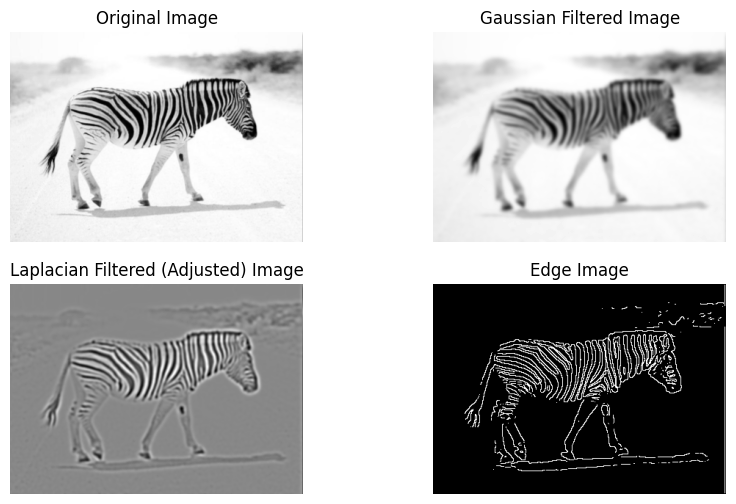

In [ ]:
z_denoised_image = denoise_image(zebra_img_arr, 2.0) # sigma = 2.0
z_laplacian_image = lapalacian_image(z_denoised_image)
z_laplacian_adjusted = imageAdjust(z_laplacian_image)
z_edge_image = zero_crossings(z_laplacian_image, 2)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(zebra_img_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(z_denoised_image, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(z_laplacian_adjusted, cmap='gray')
plt.title('Laplacian Filtered (Adjusted) Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(z_edge_image, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.show()

(-0.5, 398.5, 285.5, -0.5)

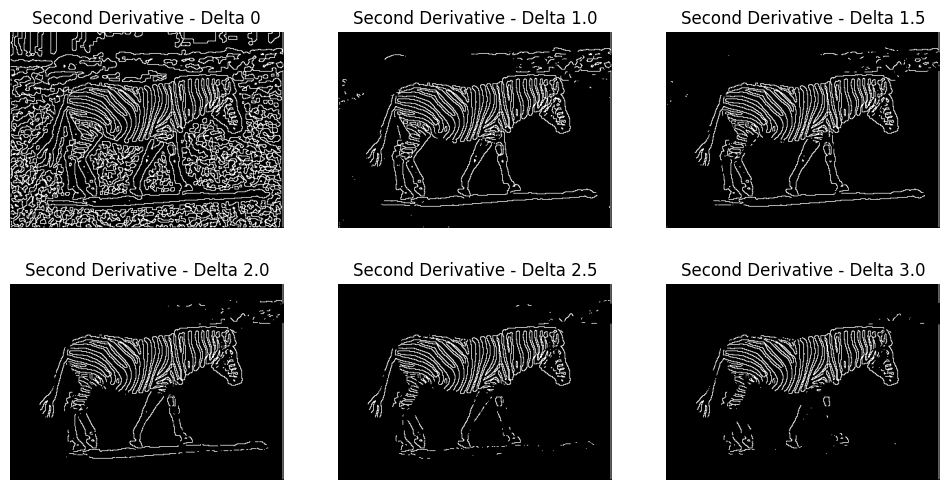

In [ ]:
z_edge_image_0 = zero_crossings(z_laplacian_image, 0)
z_edge_image_1 = zero_crossings(z_laplacian_image, 1)
z_edge_image_2 = zero_crossings(z_laplacian_image, 1.5)
z_edge_image_3 = zero_crossings(z_laplacian_image, 2.0)
z_edge_image_4 = zero_crossings(z_laplacian_image, 2.5)
z_edge_image_5 = zero_crossings(z_laplacian_image, 3.0)


plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(z_edge_image_0, cmap='gray')
plt.title('Second Derivative - Delta 0')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(z_edge_image_1, cmap='gray')
plt.title('Second Derivative - Delta 1.0')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(z_edge_image_2, cmap='gray')
plt.title('Second Derivative - Delta 1.5')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(z_edge_image_3, cmap='gray')
plt.title('Second Derivative - Delta 2.0')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(z_edge_image_4, cmap='gray')
plt.title('Second Derivative - Delta 2.5')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(z_edge_image_5, cmap='gray')
plt.title('Second Derivative - Delta 3.0')
plt.axis('off')

In [ ]:
animal = Image.open('/content/drive/MyDrive/ComputerVision_Project2/animal-family-25.jpg')
animal_img = np.array(animal.convert('L'), dtype=float)
animal_template = Image.open('/content/drive/MyDrive/ComputerVision_Project2/animal-family-25-template.jpg')
template_img = np.array(animal_template.convert('L'), dtype=float)

In [ ]:
def normalize_template(template):
    min_val = np.min(template)
    max_val = np.max(template)
    mean_val = np.mean(template)
    normalized_image = (template - mean_val) / (max_val - min_val)
    return normalized_image

In [ ]:
def cross_correlation(image, template):
    corr_result = np.zeros_like(image, dtype=float)
    template_height, template_width = template.shape
    padded_image = np.pad(image, ((template_height//2, template_height//2),
                                  (template_width//2, template_width//2)), mode='edge')
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        patch = padded_image[i:i+template_height, j:j+template_width]
        corr_result[i, j] = np.sum(patch * template)
    return corr_result

In [ ]:
def binarize_image(image, threshold):
    # Binarize image using a threshold
    binary_image = np.where(image >= threshold, 255, 0)
    return binary_image.astype(np.uint8)

def overlay_peaks(original_image, peak_image):
    # Overlay peaks onto original image
    overlay_image = original_image.copy()
    overlay_image[peak_image == 255] = 255
    return overlay_image

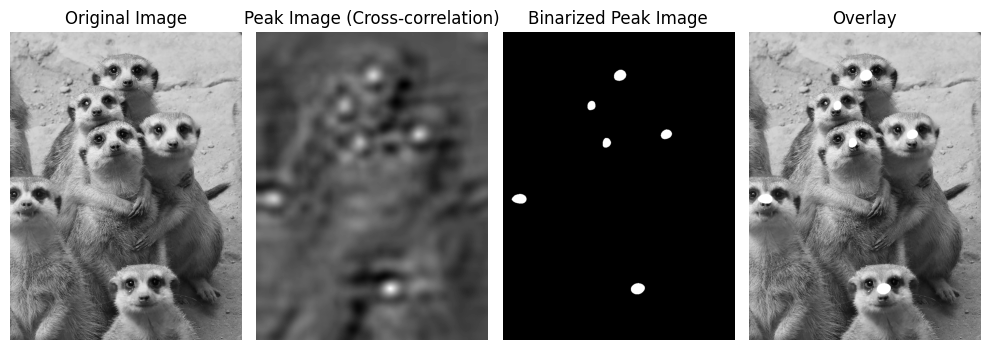

In [ ]:
normalized_template = normalize_template(template_img)

corr_image = cross_correlation(animal_img, normalized_template)

adjusted_image = imageAdjust(corr_image)

binary_peak_image = binarize_image(adjusted_image, 150) # 0.6 * 255

overlay_image = overlay_peaks(animal_img, binary_peak_image)

plt.figure(figsize=(10, 8))

plt.subplot(1, 4, 1)
plt.imshow(animal_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Peak Image (Cross-correlation)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(binary_peak_image, cmap='gray')
plt.title('Binarized Peak Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(overlay_image, cmap='gray')
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()

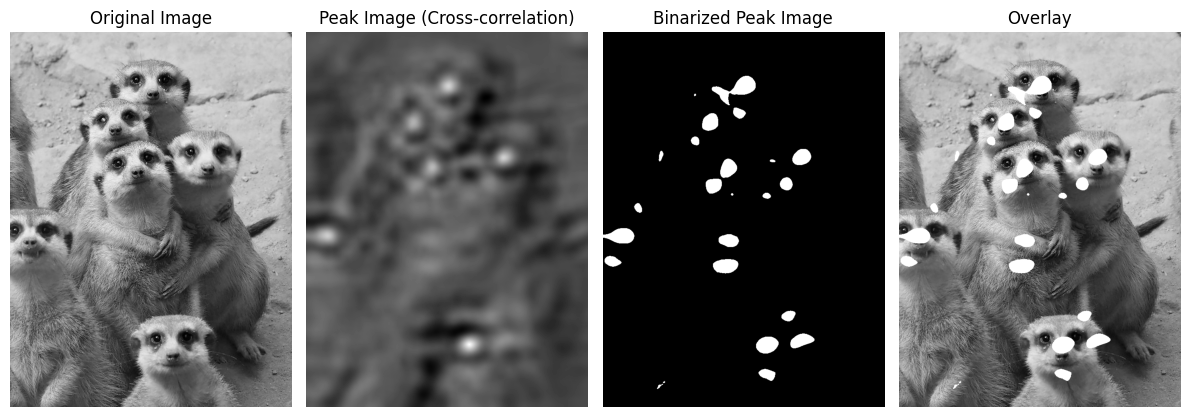

In [ ]:
binary_peak_image_120 = binarize_image(adjusted_image, 120)

overlay_image_120 = overlay_peaks(animal_img, binary_peak_image_120)

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.imshow(animal_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Peak Image (Cross-correlation)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(binary_peak_image_120, cmap='gray')
plt.title('Binarized Peak Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(overlay_image_120, cmap='gray')
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()

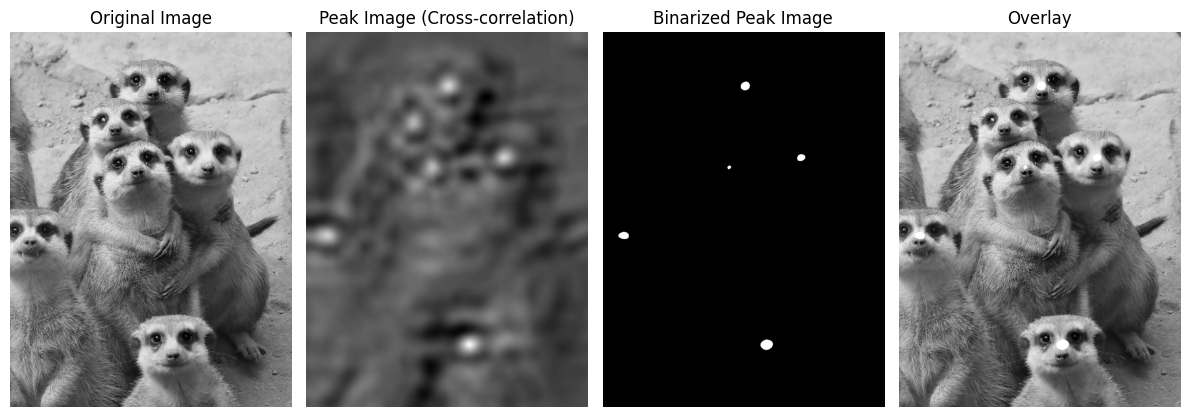

In [ ]:
binary_peak_image_180 = binarize_image(adjusted_image, 180)

overlay_image_180 = overlay_peaks(animal_img, binary_peak_image_180)

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.imshow(animal_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Peak Image (Cross-correlation)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(binary_peak_image_180, cmap='gray')
plt.title('Binarized Peak Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(overlay_image_180, cmap='gray')
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 3) Creative Part (Bonus)

In [ ]:
def connected_components(image):
  labels = np.zeros_like(image)
  label_count = 1
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i, j] == 255:
        if i > 0 and labels[i-1, j] != 0:
          labels[i, j] = labels[i-1, j]
        elif j > 0 and labels[i, j-1] != 0:
          labels[i, j] = labels[i, j-1]
        else:
          labels[i, j] = label_count
          label_count += 1
  return labels

def regions(image, peak_image):
  labeled_image = connected_components(peak_image)
  unique_labels = np.unique(labeled_image)
  peak_values = []
  for label in unique_labels:
    if label == 0:
      continue
    region_indices = np.where(labeled_image == label)
    peak_value = np.max(image[region_indices])
    peak_values.append((label, peak_value))
  return peak_values

In [ ]:
resize_factor = 0.5  # Adjust for large image
leopards = Image.open('/content/drive/MyDrive/ComputerVision_Project2/animal-family.jpeg')
leopards_img = np.array(leopards.convert('L'), dtype=float)
leopards = leopards.resize((int(leopards.width * resize_factor), int(leopards.height * resize_factor)))
leo_template = Image.open('/content/drive/MyDrive/ComputerVision_Project2/template2.jpeg')
leo_tem_img = np.array(leo_template.convert('L'), dtype=float)

In [ ]:
leo_normalized_template = normalize_template(leo_tem_img)

leo_corr_image = cross_correlation(leopards_img, leo_normalized_template)

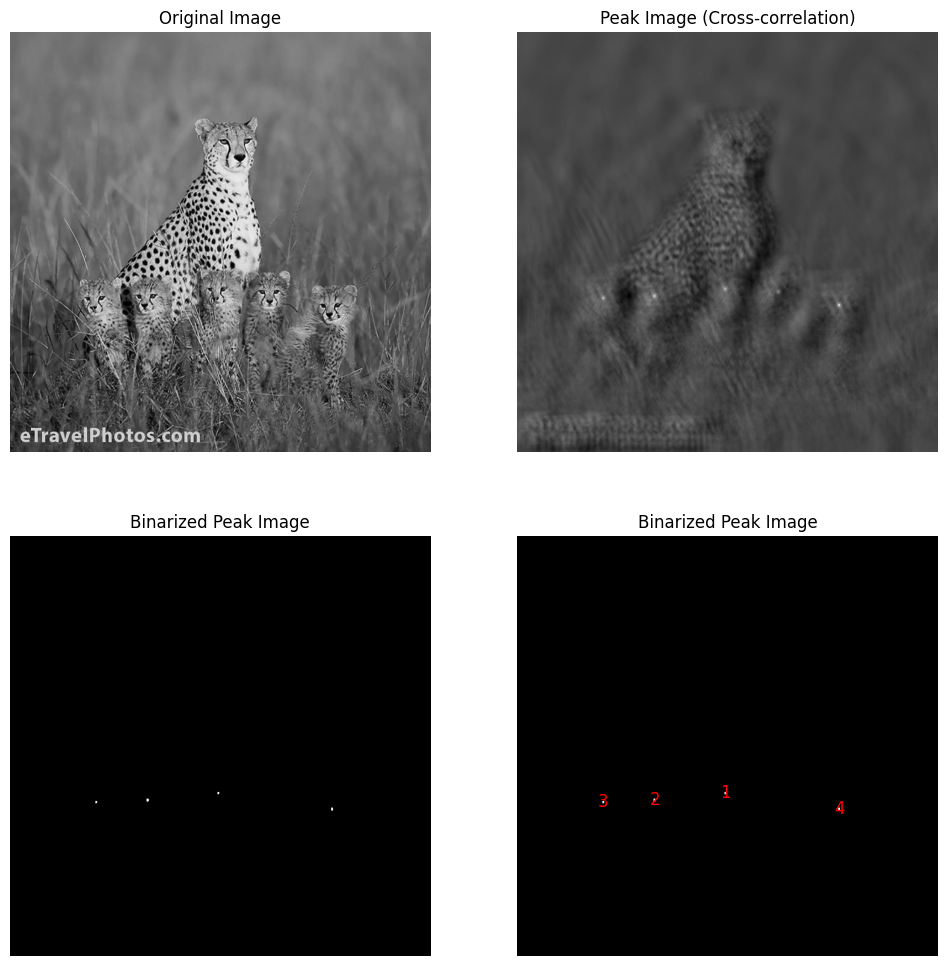

In [ ]:
leo_adjusted_image = imageAdjust(leo_corr_image)

leo_binary_peak_image = binarize_image(leo_adjusted_image, 160)

leo_overlay_image = overlay_peaks(leopards_img, leo_binary_peak_image)

blurred_peak_img = denoise_image(leo_binary_peak_image,2.0)

sorted_labels = regions(leo_adjusted_image, leo_binary_peak_image)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(leopards_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(leo_adjusted_image, cmap='gray')
plt.title('Peak Image (Cross-correlation)')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(leo_binary_peak_image, cmap='gray')
plt.title('Binarized Peak Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(leo_binary_peak_image, cmap='gray')
plt.title('Binarized Peak Image')
plt.axis('off')
# Add region numbers to the peak image
for label, _ in sorted_labels:
    region_indices = np.where(connected_components(leo_binary_peak_image) == label)
    text_x = np.mean(region_indices[1])
    text_y = np.mean(region_indices[0])
    plt.text(text_x, text_y, str(label), color='red', fontsize=12, ha='center', va='center')
plt.show()

In [ ]:
for i, (label, peak_value) in enumerate(sorted_labels):
    print(f"Region {i+1}: Label - {label}, Peak Value - {peak_value}")

Region 1: Label - 1, Peak Value - 189
Region 2: Label - 2, Peak Value - 214
Region 3: Label - 3, Peak Value - 203
Region 4: Label - 4, Peak Value - 255
